# Customer Churn Analysis

## Project Overview

SyriaTel, a leading telecommunications company, faces a critical challenge in retaining its customers, as high churn rates threaten its revenue and market position. The objective of this project is to develop a machine learning model to predict customer churn by analyzing historical data, including customer demographics, service usage, customer interactions, billing information, and past churn records. By identifying patterns and factors that contribute to churn, the model will enable SyriaTel to implement targeted retention strategies such as personalized offers, loyalty programs, and enhanced customer support. This project involves data collection, preparation, exploratory data analysis, model building and evaluation, and deployment. Continuous monitoring and updating of the model will ensure its effectiveness over time, helping SyriaTel to proactively engage at-risk customers and improve overall customer retention

## Business Problem

SyriaTel, a leading telecommunications company, is struggling with customer retention, which is a critical issue for maintaining their revenue and market share. Customer churn, the phenomenon where customers discontinue their services, is a significant threat to their business. High churn rates can lead to substantial revenue loss and increased costs associated with acquiring new customers.

To address this challenge, it is essential for SyriaTel to understand the underlying reasons why customers are leaving and identify which customers are most likely to churn. By analyzing customer data, including behavior, usage patterns, and demographic information, SyriaTel can develop predictive models to forecast churn. These insights will enable the company to implement targeted interventions aimed at retaining at-risk customers, enhancing customer satisfaction, and ultimately reducing churn rates. This proactive approach is vital for sustaining revenue growth and securing a competitive edge in the telecommunications market.

## Data Understanding

This customer churn dataset is designed to predict which customers are likely to leave the company. It contains various features that describe customer demographics,account information, service usage patterns, and their churn status  . The dataset is sourced from a Kaggle competition aimed at developing predictive models for customer churn.

**Here's a summary of the columns:**
- state: The state of the customer.
  
- account length: The length of the account in days or months.

- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import the class 
from  customer_churn_analysis import CustomerChurnDataset

In [3]:
# Read my dataset
# Instantiate the class with the file name
df = CustomerChurnDataset('Customer_Churn.csv')

In [4]:
df

In [55]:
df.df_info()

AttributeError: 'DataFrame' object has no attribute 'df_info'

> The range index, indicating the number of rows in the DataFrame from 0 to 3332.
>-  total number of columns 21 columns.
>- For each column, it provides:
>- The column name (Column)
>- The non-null count of values (Non-Null Count)
>- The dataset has no null value

In [6]:
summary_result = df.statistical_summary()
summary_result

Statistical Summary of the Dataset:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std

> The above is the statistical summary of each column in terms of the count of the rows in the dataset, the mean value, the standard deviation, the median , the 25th percentile and the 75th percentile and the maximum results of each column


In [15]:
# The coumns of the dataset
df.get_columns()

Columns of the Dataset:
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [16]:
# Getting the datatype of each column
df.get_dtypes()

Data Types of Columns:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [9]:
#  The shape of the dataset
df.df_shape()

Shape of the Dataset:
(3333, 21)


>The dataset has a shape of 3333 rows and 21 columns

## Data Preparation

### Data Cleaning

The processes that I will follow during data cleaning process

> - Checking for null values
> - Checking for duplicates
> - Changing datatypes of columns and Binary Encoding
> - Checking for outliers

In [26]:
df = pd.read_csv('Customer_Churn.csv')


Checking for null values

In [27]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

>The dataset looks fairly clean already (no non-null items). But there are object datatypes that I will like to handle them in a different way that is converting them to 0s and 1s, The process is calles called binary encoding

Checking for duplicates

In [37]:
df.duplicated().sum()


0

> The dataset has no null value

In [31]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Binary Encoding

Handling object data in the following ways:
- Converting no's to 0 and yes's to 1.
- Converting True to 1 and False to 0.

In [39]:
# Change churn to values: 1 (churned/True) 0 (no churn/False)
df.loc[df['churn'] == True, 'churn'] = 1
df.loc[df['churn'] == False, 'churn'] = 0

In [30]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [33]:
# Handle object types for international plan and voice mail plan
df.loc[df['international plan'] == 'no', 'international plan'] = 0
df.loc[df['international plan'] == 'yes', 'international plan'] = 1 

 

In [35]:
df['international plan'].value_counts()

international plan
0    3010
1     323
Name: count, dtype: int64

In [34]:
df.loc[df['voice mail plan'] == 'no', 'voice mail plan'] = 0
df.loc[df['voice mail plan']== 'yes', 'voice mail plan'] = 1

In [36]:
df['voice mail plan'].value_counts()

voice mail plan
0    2411
1     922
Name: count, dtype: int64

Changing datatypes

In [41]:
# casting int values to churn, voice mail plan, and international plan cols
objs = ['international plan', 'voice mail plan', 'churn']

for o in objs:
    df = df.astype({o: int})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int32  
 5   voice mail plan         3333 non-null   int32  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

> The datatypes of `international plan`, `voice mail plan`, `churn` has been converted to Numerical datatypes

Dropping Columns

In [53]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


These are the unique values present in the dataset. Here the `phone number`column has the data unique Id given to the customers which is not required for the predictions. Let me drop this column.

In [54]:
df.drop(columns = 'phone number',axis = 1, inplace = True)

Checking for outliers

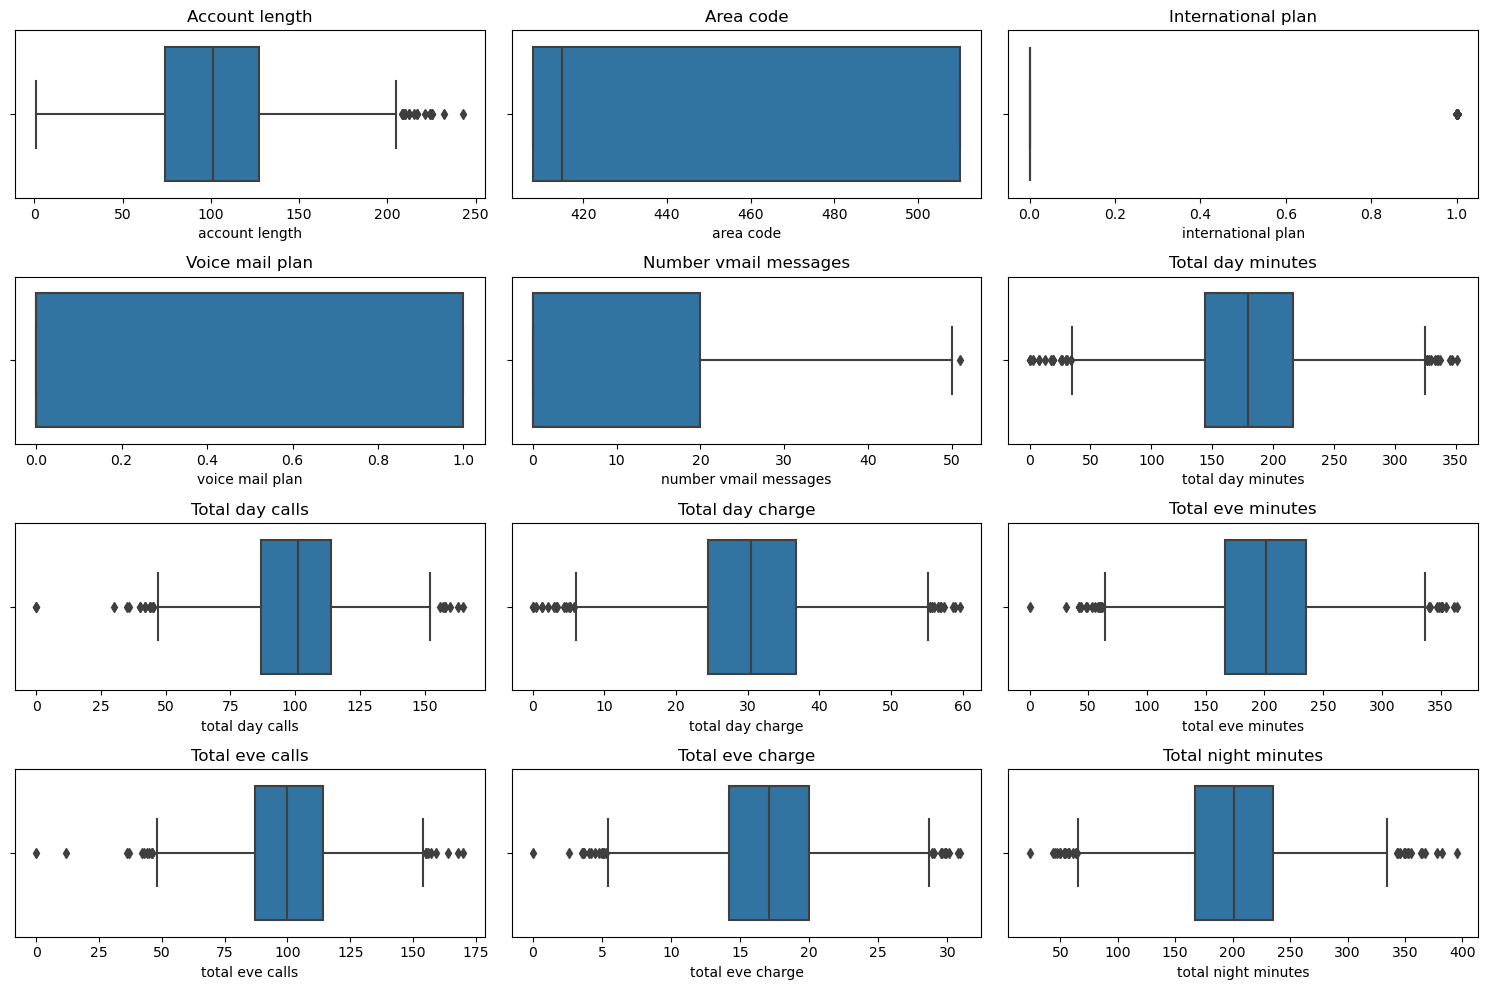

In [52]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 12:  # Limit to 12 subplots
        plt.subplot(4, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'{column.capitalize()}')
        plt.xlabel(column)

plt.tight_layout()
plt.show()


Looking at the boxplots it shows that we have outliers. But I can't just drop the outliers blindly. Let me me take time to look at what is going on

In [56]:
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Account Length: The maximum value of 243 seems plausible, as it represents the number of days a customer has been with the service provider. 
International Plan and Voice Mail Plan: These variables seem to be binary (0 or 1), and the minimum and maximum values of 0 and 1 are expected and realistic.

Number of Voice Mail Messages: The maximum value of 51 seems plausible, as some customers may receive a large number of voice mail messages. However, without additional context, it's difficult to assess its realism.

Total Day, Evening, and Night Minutes: The maximum values for these variables (350.8, 363.7, and 395.0, respectively) are within the plausible range for minutes of usage, especially for heavy users or during exceptional circumstances. However, it's essential to verify if these values align with typical usage patterns in the dataset.

Total Day, Evening, and Night Calls: The maximum values of 165, 170, and 175, respectively, seem high but could be realistic during peak usage times or for customers with specific needs. Again, it's important to validate these values based on the context of the data.

Total Day, Evening, and Night Charge: The maximum values for charges seem reasonable given the corresponding maximum minutes of usage.

Total International Minutes, Calls, and Charges: The maximum values appear plausible but may require further validation based on international calling patterns and associated charges.

Customer Service Calls: The maximum value of 9 for the number of customer service calls is relatively high but could occur for customers experiencing multiple issues or requiring extensive support. However, it's essential to verify if such occurrences are common in the dataset.

In [ ]:
# Function to find upper and lower limits for our features
def find_outlier_limits(column, num_std=3):
    
    mean = np.mean(column)
    std_dev = np.std(column)
    
    lower_limit = mean - num_std * std_dev
    upper_limit = mean + num_std * std_dev
    
    return lower_limit, upper_limit

# Function to filter outliers
def filter_outliers(data, num_std=3,exclude_columns = []):
    
    filtered_data = data.copy()

    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
            lower_limit, upper_limit = find_outlier_limits(data[col], num_std)
            print(f"{col}\n-----------------\nLower Limit: {lower_limit}, Upper Limit: {upper_limit}")
            outliers_removed = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]
            print(f"Outliers removed in column '{col}': {outliers_removed}")
            print("===============================================================================\n")
            outliers_mask = (data[col] < lower_limit) | (data[col] > upper_limit)
            
            filtered_data = filtered_data[~outliers_mask]
    
    return filtered_data


columns_to_exclude = ['view_rating', 'yr_built', 'yr_renovated','price', 'grade', 'waterfront', 'zipcode', 'city', 'lat', 'long']
clean_data = filter_outliers(data,num_std = 3, exclude_columns = columns_to_exclude)
print('Original data:', len(data))
print(f"Filtered data: {len(clean_data)}")
print("\n===============================================================================")

### EDA

### modelling

### Model Validation

### Model Deployment

### Conclusion

### Recommendations